In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score 
import seaborn as sns

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [38]:
print('train : ', train.shape)
print('test : ', test.shape)

train :  (891, 11)
test :  (418, 10)


In [5]:
test.Cabin

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int32  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    int32  
 10  Embarked     891 non-null    int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 62.8 KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
type(train.isnull().sum())

pandas.core.series.Series

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [40]:
missing = train.isnull().sum()
print(missing)
missing_values = missing[missing > 0]
print(missing_values)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Series([], dtype: int64)


In [41]:
avg_age = train['Age'].mean(axis = 0)
print('This is the average age: ', avg_age)

train['Age'].fillna(avg_age, inplace = True)

This is the average age:  29.699117647058763


In [42]:
train.Cabin = train['Cabin'].fillna('Unknown')
avg_age_2 = test['Age'].mean(axis = 0)
print('This is the average age: ', avg_age_2)

test['Age'].fillna(avg_age_2, inplace = True)
test.Cabin = test.Cabin.fillna('Unknown')

This is the average age:  30.272590361445815


In [30]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [32]:
train.Embarked.mode()
train.Embarked.fillna(test.Embarked.mode(), inplace = True)

In [33]:
test.Fare.fillna(test.Fare.mean(axis = 0), inplace = True)

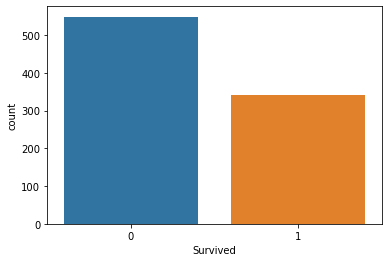

In [96]:
sns.countplot(data = train, x = 'Survived')

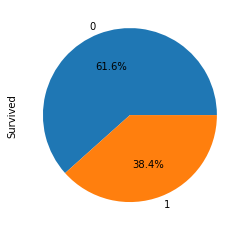

In [80]:
train.Survived.value_counts().plot.pie(autopct = '%1.1f%%')

In [99]:
#sns.histplot(data = train, x = 'Age', hue = 'Survived', kde = 'True')

AttributeError: module 'seaborn' has no attribute 'histplot'

In [34]:
categorical_cols = train.select_dtypes(include = 'object')

In [43]:
categorical_cols[:1]

""
0


In [36]:
#cols = ['Name', 'Sex', 'Cabin', 'Ticket', 'Embarked']
for col in categorical_cols.columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))

In [37]:
categorical_cols[5 : ]

""
5
6
7
8
9
...
886
887
888
889


In [17]:
#cols = ['Name', 'Sex', 'Cabin', 'Ticket', 'Embarked']
for col in categorical_cols.columns:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col].astype(str))

In [18]:
cols_to_drop = ['Name']
train.drop(cols_to_drop, 1, inplace = True)
test.drop(cols_to_drop, 1, inplace = True)
test['Embarked']

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int32

In [22]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [20]:
Rf=RandomForestClassifier(n_estimators=100,random_state=99)

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int32  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    int32  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    int32  
 9   Embarked     891 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 55.8 KB


In [23]:
Rf_result=cross_val_score(Rf, X, y,cv=10)
print("Random Forest Accuracy is:",Rf_result)
Rf_result.mean()

C:\Users\RosaY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RosaY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RosaY\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\RosaY\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\RosaY\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\RosaY\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  Fi

Random Forest Accuracy is: [nan nan nan nan nan nan nan nan nan nan]


nan

In [66]:
train_x, val_x, train_y, val_y = train_test_split(X, y, random_state = 42)
Rf.fit(train_x, train_y)

RandomForestClassifier(random_state=99)

In [67]:
train_x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
298,299,1,1,29.699118,0,0,98,30.5000,51,2
884,885,3,1,25.000000,0,0,650,7.0500,147,2
247,248,2,0,24.000000,0,2,166,14.5000,147,2
478,479,3,1,22.000000,0,0,411,7.5208,147,2
305,306,1,1,0.920000,1,2,37,151.5500,62,2
...,...,...,...,...,...,...,...,...,...,...
106,107,3,0,21.000000,0,0,296,7.6500,147,2
270,271,1,1,29.699118,0,0,47,31.0000,147,2
860,861,3,1,41.000000,2,0,399,14.1083,147,2
435,436,1,0,14.000000,1,2,33,120.0000,47,2


In [43]:
val_x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,3,1,29.699118,1,1,189,15.2458,147,1
439,440,2,1,31.000000,0,0,547,10.5000,147,3
840,841,3,1,20.000000,0,0,647,7.9250,147,3
720,721,2,0,6.000000,0,1,155,33.0000,147,3
39,40,3,0,14.000000,1,0,186,11.2417,147,1
...,...,...,...,...,...,...,...,...,...,...
880,881,2,0,25.000000,0,1,115,26.0000,147,3
425,426,3,1,29.699118,0,0,521,7.2500,147,3
101,102,3,1,29.699118,0,0,361,7.8958,147,3
199,200,2,0,24.000000,0,0,160,13.0000,147,3


In [44]:
train_y

298    1
884    0
247    1
478    0
305    1
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 668, dtype: int64

In [46]:
val_y

709    1
439    0
840    0
720    1
39     1
      ..
880    1
425    0
101    0
199    0
424    0
Name: Survived, Length: 223, dtype: int64

In [40]:
val_predictions = Rf.predict(val_x)
print(accuracy_score(val_y, val_predictions))

0.8251121076233184


In [68]:
Rf.fit(X, y)

RandomForestClassifier(random_state=99)

In [50]:
test_yhat=Rf.predict(test)

In [1]:
from knn_classifier import *

0.9666666666666667
1.0
0.9666666666666667


In [2]:
mypred = [knn_predict() for p in train_x]

NameError: name 'train_x' is not defined

In [67]:
output = pd.DataFrame({"PassengerId":test.PassengerId, 'Survived': test_yhat})

In [68]:
output.to_csv('PredictionResult.csv')